In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,adjusted_rand_score
from scipy.spatial.distance import cdist
from math import pi
import seaborn as sns
import matplotlib as plt
import pandas as pd

In [7]:
%run 0-nettoyage-bdd-v2.ipynb

In [8]:
base=nettoyer_lic_comm("https://www.data.gouv.fr/fr/datasets/r/9b002e32-0ec9-40fc-9292-cddeae4416c6","https://www.insee.fr/fr/statistiques/fichier/4989724/ensemble.xlsx")

C:\Users\user\AppData\Local\Temp\ipykernel_10036\775948522.py:5: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  lic_comm = pd.read_csv(chemin_acces_lic_comm, encoding="utf-8", sep=";")


In [9]:
base

,Département,Code,Fédération,Région,categorie,nb_licencies,tranche_age,sexe,Nom de la région,Code département,Nom du département,Population municipale,Population totale
0,01,101,FF d'Athlétisme,Auvergne-Rhône-Alpes,F - 1 à 4 ans,4,1-4,F,Auvergne-Rhône-Alpes,01,Ain,647634,663720
1,01,102,FF d'Aviron,Auvergne-Rhône-Alpes,F - 1 à 4 ans,0,1-4,F,Auvergne-Rhône-Alpes,01,Ain,647634,663720
2,01,103,FF de Badminton,Auvergne-Rhône-Alpes,F - 1 à 4 ans,0,1-4,F,Auvergne-Rhône-Alpes,01,Ain,647634,663720
3,01,105,FF de Basketball,Auvergne-Rhône-Alpes,F - 1 à 4 ans,19,1-4,F,Auvergne-Rhône-Alpes,01,Ain,647634,663720
4,01,106,FF de Boxe,Auvergne-Rhône-Alpes,F - 1 à 4 ans,0,1-4,F,Auvergne-Rhône-Alpes,01,Ain,647634,663720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313373,974,601,FF du Sport Universitaire,DROM,H - 80 à 99 ans,0,60-99,H,La Réunion,974,La Réunion,855961,865507
313374,974,602,F Sportive Educative de l'Enseignement Catholi...,DROM,H - 80 à 99 ans,0,60-99,H,La Réunion,974,La Réunion,855961,865507
313375,974,603,Union Nationale des Clubs Universitaires,DROM,H - 80 à 99 ans,0,60-99,H,La Réunion,974,La Réunion,855961,865507
313376,974,604,Union Nationale du Sport Scolaire (UNSS),DROM,H - 80 à 99 ans,0,60-99,H,La Réunion,974,La Réunion,855961,865507


In [39]:
base_homme=base[base['sexe']=='F']
base_homme[["Région",'Fédération',"nb_licencies"]].groupby(['Région','Fédération']).sum().reset_index()
base_homme_pivot=pd.pivot_table(base_homme, values='nb_licencies', index='Région', columns='Fédération', fill_value=0)
base_homme_pivot=base_homme_pivot.reset_index()
base_homme_pivot=base_homme_pivot.rename_axis(None, axis=1).reset_index(drop=True)
base_homme_pivot

,Région,F Nationale du Sport en Milieu Rural,F Nautique de Pêche Sportive en Apnée,F Sportive Educative de l'Enseignement Catholique (UGSEL),F Sportive des ASPTT,F Sportive et Gymnique du Travail,F des Arts Énergétiques et Martiaux Chinois,FF Aéronautique,FF Handisport,FF Motonautique,...,FF du Sport Automobile,FF du Sport Boules,FF du Sport Travailliste,FF du Sport Universitaire,FF du Sport d'Entreprise,Union Française des Œuvres Laïques d'Éducation Physique (UFOLEP),Union Nationale Sportive Léo Lagrange,Union Nationale des Clubs Universitaires,Union Nationale du Sport Scolaire (UNSS),Union Sportive de l'Enseignement du Premier Degré
0,Auvergne-Rhône-Alpes,13.225490,0.000000,201.235294,28.274510,53.338235,6.642157,1.745098,5.475490,0.019608,...,4.171569,17.985294,3.331551,23.779412,1.106952,182.495098,14.670588,36.588235,298.279412,244.142157
1,Bourgogne-Franche-Comté,4.689076,0.000000,24.073529,20.845588,11.661765,3.050420,1.000000,5.397059,0.019608,...,3.110294,3.639706,1.080882,18.808824,0.463235,30.044118,9.341176,0.137255,188.242647,133.801471
2,Bretagne,37.338235,0.058824,799.161765,42.911765,108.691176,6.264706,2.191176,6.617647,0.000000,...,1.132353,1.000000,3.735294,36.029412,0.955882,135.691176,9.014706,0.176471,262.500000,179.205882
3,Centre-Val de Loire,2.294118,0.000000,120.686275,51.470588,7.852941,7.637255,1.078431,2.049020,0.000000,...,1.931373,1.196078,2.941176,5.254902,2.941176,81.823529,1.611765,3.872549,175.852941,170.813725
4,Corse,0.058824,0.058824,0.558824,10.000000,23.588235,0.000000,0.882353,0.235294,0.058824,...,6.117647,0.000000,0.294118,49.441176,0.529412,4.558824,0.000000,0.176471,57.235294,87.352941
5,DROM,2.607843,0.000000,14.514706,7.250000,9.838235,4.514706,0.955882,2.558824,0.088235,...,1.647059,0.000000,2.808824,17.088235,10.294118,14.470588,0.058824,0.058824,242.000000,254.970588
6,Grand Est,5.323529,0.000000,106.552941,43.305882,26.147059,6.389706,1.152941,5.447059,0.000000,...,1.911765,0.441176,2.800000,18.117647,4.417647,47.600000,5.196078,0.139706,298.894118,212.470588
7,Hauts-de-France,45.882353,0.014706,597.800000,18.976471,35.647059,11.400000,1.988235,10.435294,0.019608,...,3.352941,1.800000,13.011765,51.647059,0.717647,205.764706,33.211765,45.411765,461.470588,354.141176
8,Normandie,72.294118,0.105882,152.058824,49.976471,33.117647,2.729412,1.258824,1.905882,0.205882,...,4.294118,1.647059,1.058824,16.658824,0.164706,33.152941,11.917647,10.270588,306.811765,83.058824
9,Nouvelle-Aquitaine,10.137255,0.176471,81.289216,30.259804,18.544118,8.219251,1.637255,3.867647,0.022059,...,2.137255,1.436275,2.333333,17.127451,0.329412,104.338235,12.862745,1.455882,233.250000,220.073529


In [17]:
base_femme=base[base['sexe']=='F']
base_femme

,Département,Code,Fédération,Région,categorie,nb_licencies,tranche_age,sexe,Nom de la région,Code département,Nom du département,Population municipale,Population totale
0,01,101,FF d'Athlétisme,Auvergne-Rhône-Alpes,F - 1 à 4 ans,4,1-4,F,Auvergne-Rhône-Alpes,01,Ain,647634,663720
1,01,102,FF d'Aviron,Auvergne-Rhône-Alpes,F - 1 à 4 ans,0,1-4,F,Auvergne-Rhône-Alpes,01,Ain,647634,663720
2,01,103,FF de Badminton,Auvergne-Rhône-Alpes,F - 1 à 4 ans,0,1-4,F,Auvergne-Rhône-Alpes,01,Ain,647634,663720
3,01,105,FF de Basketball,Auvergne-Rhône-Alpes,F - 1 à 4 ans,19,1-4,F,Auvergne-Rhône-Alpes,01,Ain,647634,663720
4,01,106,FF de Boxe,Auvergne-Rhône-Alpes,F - 1 à 4 ans,0,1-4,F,Auvergne-Rhône-Alpes,01,Ain,647634,663720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156684,974,601,FF du Sport Universitaire,DROM,F - 80 à 99 ans,0,60-99,F,La Réunion,974,La Réunion,855961,865507
156685,974,602,F Sportive Educative de l'Enseignement Catholi...,DROM,F - 80 à 99 ans,0,60-99,F,La Réunion,974,La Réunion,855961,865507
156686,974,603,Union Nationale des Clubs Universitaires,DROM,F - 80 à 99 ans,0,60-99,F,La Réunion,974,La Réunion,855961,865507
156687,974,604,Union Nationale du Sport Scolaire (UNSS),DROM,F - 80 à 99 ans,0,60-99,F,La Réunion,974,La Réunion,855961,865507


In [20]:
#les sports plus pratiques par regions chez lzs femmes
base_femme=base_femme[["Région",'Fédération',"nb_licencies"]].groupby(['Région','Fédération']).sum().reset_index()
base_femme
#les sports plus pratiqués par régions
#base_femme=base[["Région",'Fédération',"nb_licencies"]].groupby(['Région','Fédération']).sum().reset_index()
""" #On retire les fdérations qui ne précisent pas le sport pratiqué (UNSS, )
base_femme = base_femme[(base_femme["Fédération"]!= "FF Sports Pour Tous") &
                                  (base_femme["Fédération"]!= "FF du Sport Universitaire") &
                                  (base_femme["Fédération"]!= "F Sportive Educative de l'Enseignement Catholique (UGSEL)") &
                                  (base_femme["Fédération"]!= "Union Française des Œuvres Laïques d'Éducation Physique (UFOLEP)") &
                                  (base_femme["Fédération"]!= "Union Nationale du Sport Scolaire (UNSS)") &
                                  (base_femme["Fédération"]!= "Union Sportive de l'Enseignement du Premier Degré ") &
                                  (base_femme["Fédération"]!= "F Sportive et Gymnique du Travail") &
                                  (base_femme["Fédération"]!= "FF de la Retraite Sportive")]


#Hors UNSS 
base_femme = base_femme[base_femme['Fédération'] != "F Sportive Educative de l'Enseignement Catholique (UGSEL)"]
base_femme = base_femme[base_femme['Fédération'] != "Union Sportive de l'Enseignement du Premier Degré"]
base_femme = base_femme[base_femme['Fédération'] != "Union Nationale du Sport Scolaire (UNSS)"] """

' #On retire les fdérations qui ne précisent pas le sport pratiqué (UNSS, )\nbase_femme = base_femme[(base_femme["Fédération"]!= "FF Sports Pour Tous") &\n                                  (base_femme["Fédération"]!= "FF du Sport Universitaire") &\n                                  (base_femme["Fédération"]!= "F Sportive Educative de l\'Enseignement Catholique (UGSEL)") &\n                                  (base_femme["Fédération"]!= "Union Française des Œuvres Laïques d\'Éducation Physique (UFOLEP)") &\n                                  (base_femme["Fédération"]!= "Union Nationale du Sport Scolaire (UNSS)") &\n                                  (base_femme["Fédération"]!= "Union Sportive de l\'Enseignement du Premier Degré ") &\n                                  (base_femme["Fédération"]!= "F Sportive et Gymnique du Travail") &\n                                  (base_femme["Fédération"]!= "FF de la Retraite Sportive")]\n\n\n#Hors UNSS \nbase_femme = base_femme[base_femme[\'Fédération\

In [21]:
base_femme

,Région,Fédération,nb_licencies
0,Auvergne-Rhône-Alpes,F Nationale du Sport en Milieu Rural,2698
1,Auvergne-Rhône-Alpes,F Nautique de Pêche Sportive en Apnée,0
2,Auvergne-Rhône-Alpes,F Sportive Educative de l'Enseignement Catholi...,41052
3,Auvergne-Rhône-Alpes,F Sportive des ASPTT,5768
4,Auvergne-Rhône-Alpes,F Sportive et Gymnique du Travail,10881
...,...,...,...
1353,Île-de-France,Union Française des Œuvres Laïques d'Éducation...,25667
1354,Île-de-France,Union Nationale Sportive Léo Lagrange,969
1355,Île-de-France,Union Nationale des Clubs Universitaires,2917
1356,Île-de-France,Union Nationale du Sport Scolaire (UNSS),75897


In [32]:
base_femme_pivot=pd.pivot_table(base_femme, values='nb_licencies', index='Région', columns='Fédération', fill_value=0)
base_femme_pivot=base_femme_pivot.reset_index()
base_femme_pivot=base_femme_pivot.rename_axis(None, axis=1).reset_index(drop=True)
base_femme_pivot

,Région,F Nationale du Sport en Milieu Rural,F Nautique de Pêche Sportive en Apnée,F Sportive Educative de l'Enseignement Catholique (UGSEL),F Sportive des ASPTT,F Sportive et Gymnique du Travail,F des Arts Énergétiques et Martiaux Chinois,FF Aéronautique,FF Handisport,FF Motonautique,...,FF du Sport Automobile,FF du Sport Boules,FF du Sport Travailliste,FF du Sport Universitaire,FF du Sport d'Entreprise,Union Française des Œuvres Laïques d'Éducation Physique (UFOLEP),Union Nationale Sportive Léo Lagrange,Union Nationale des Clubs Universitaires,Union Nationale du Sport Scolaire (UNSS),Union Sportive de l'Enseignement du Premier Degré
0,Auvergne-Rhône-Alpes,2698.0,0.0,41052.0,5768.0,10881.0,1355.0,356.0,1117.0,3.0,...,851.0,3669.0,623.0,4851.0,207.0,37229.0,2494.0,7464.0,60849.0,49805.0
1,Bourgogne-Franche-Comté,558.0,0.0,3274.0,2835.0,1586.0,363.0,136.0,734.0,2.0,...,423.0,495.0,147.0,2558.0,63.0,4086.0,794.0,14.0,25601.0,18197.0
2,Bretagne,2539.0,4.0,54343.0,2918.0,7391.0,426.0,149.0,450.0,0.0,...,77.0,68.0,254.0,2450.0,65.0,9227.0,613.0,12.0,17850.0,12186.0
3,Centre-Val de Loire,195.0,0.0,12310.0,5250.0,801.0,779.0,110.0,209.0,0.0,...,197.0,122.0,300.0,536.0,300.0,8346.0,137.0,395.0,17937.0,17423.0
4,Corse,2.0,2.0,19.0,340.0,802.0,0.0,30.0,8.0,2.0,...,208.0,0.0,10.0,1681.0,18.0,155.0,0.0,6.0,1946.0,2970.0
5,DROM,133.0,0.0,987.0,493.0,669.0,307.0,65.0,174.0,3.0,...,112.0,0.0,191.0,1162.0,525.0,984.0,2.0,4.0,16456.0,17338.0
6,Grand Est,905.0,0.0,18114.0,7362.0,4445.0,869.0,196.0,926.0,0.0,...,325.0,75.0,476.0,3080.0,751.0,8092.0,795.0,19.0,50812.0,36120.0
7,Hauts-de-France,3900.0,1.0,50813.0,1613.0,3030.0,969.0,169.0,887.0,1.0,...,285.0,153.0,1106.0,4390.0,61.0,17490.0,2823.0,3860.0,39225.0,30102.0
8,Normandie,6145.0,9.0,12925.0,4248.0,2815.0,232.0,107.0,162.0,14.0,...,365.0,140.0,90.0,1416.0,14.0,2818.0,1013.0,873.0,26079.0,7060.0
9,Nouvelle-Aquitaine,2068.0,21.0,16583.0,6173.0,3783.0,1537.0,334.0,789.0,3.0,...,436.0,293.0,476.0,3494.0,56.0,21285.0,1312.0,297.0,47583.0,44895.0


In [26]:
def sports_parmi_les_5_sports_plus_pratiques(base):
    list_region=base['Région'].unique()
    data=[]
    for region in list_region:
        top_5=base[base['Région']==region].sort_values(by='nb_licencies',ascending=False).head(5)['Fédération'].tolist()
        data.append(top_5)
    # Concaténation des sous-listes en une seule liste
    federations_concatenees = [federation for sublist in data for federation in sublist]

    # Obtention des valeurs uniques
    top_5= list(set(federations_concatenees))
    return top_5

In [28]:
top_5_femme=sports_parmi_les_5_sports_plus_pratiques(base_femme)
top_5_femme

['FF du Sport Universitaire',
 'FF Sports Pour Tous',
 'FF de Natation',
 'Union Nationale du Sport Scolaire (UNSS)',
 'FF de Handball',
 "Union Sportive de l'Enseignement du Premier Degré",
 'FF de Tennis',
 'FF de Gymnastique',
 'FF de Basketball',
 "FF d'Équitation",
 "FF d'Éducation Physique et de Gymnastique Volontaire",
 "F Sportive Educative de l'Enseignement Catholique (UGSEL)"]

In [35]:
base_classification_femme=base_femme_pivot[["Région"]+top_5_femme]
base_classification_femme=base_classification_femme.set_index('Région')
base_classification_femme

,FF du Sport Universitaire,FF Sports Pour Tous,FF de Natation,Union Nationale du Sport Scolaire (UNSS),FF de Handball,Union Sportive de l'Enseignement du Premier Degré,FF de Tennis,FF de Gymnastique,FF de Basketball,FF d'Équitation,FF d'Éducation Physique et de Gymnastique Volontaire,F Sportive Educative de l'Enseignement Catholique (UGSEL)
Région,,,,,,,,,,,,
Auvergne-Rhône-Alpes,4851.0,15597.0,27356.0,60849.0,18433.0,49805.0,35752.0,29134.0,28939.0,62636.0,69919.0,41052.0
Bourgogne-Franche-Comté,2558.0,7177.0,8807.0,25601.0,9445.0,18197.0,8475.0,12035.0,5457.0,24096.0,18584.0,3274.0
Bretagne,2450.0,21619.0,5580.0,17850.0,14403.0,12186.0,12575.0,11487.0,13283.0,27029.0,17742.0,54343.0
Centre-Val de Loire,536.0,5736.0,6528.0,17937.0,7673.0,17423.0,11283.0,11387.0,7367.0,23399.0,30216.0,12310.0
Corse,1681.0,586.0,1052.0,1946.0,542.0,2970.0,1173.0,1824.0,367.0,2200.0,1405.0,19.0
DROM,1162.0,1268.0,5898.0,16456.0,6434.0,17338.0,5085.0,6492.0,2468.0,4644.0,4086.0,987.0
Grand Est,3080.0,24659.0,17801.0,50812.0,16368.0,36120.0,22448.0,31631.0,12861.0,44891.0,27094.0,18114.0
Hauts-de-France,4390.0,20120.0,13172.0,39225.0,11606.0,30102.0,18534.0,18328.0,15150.0,48578.0,23492.0,50813.0
Normandie,1416.0,7706.0,8289.0,26079.0,11195.0,7060.0,13007.0,20303.0,7363.0,30054.0,28294.0,12925.0


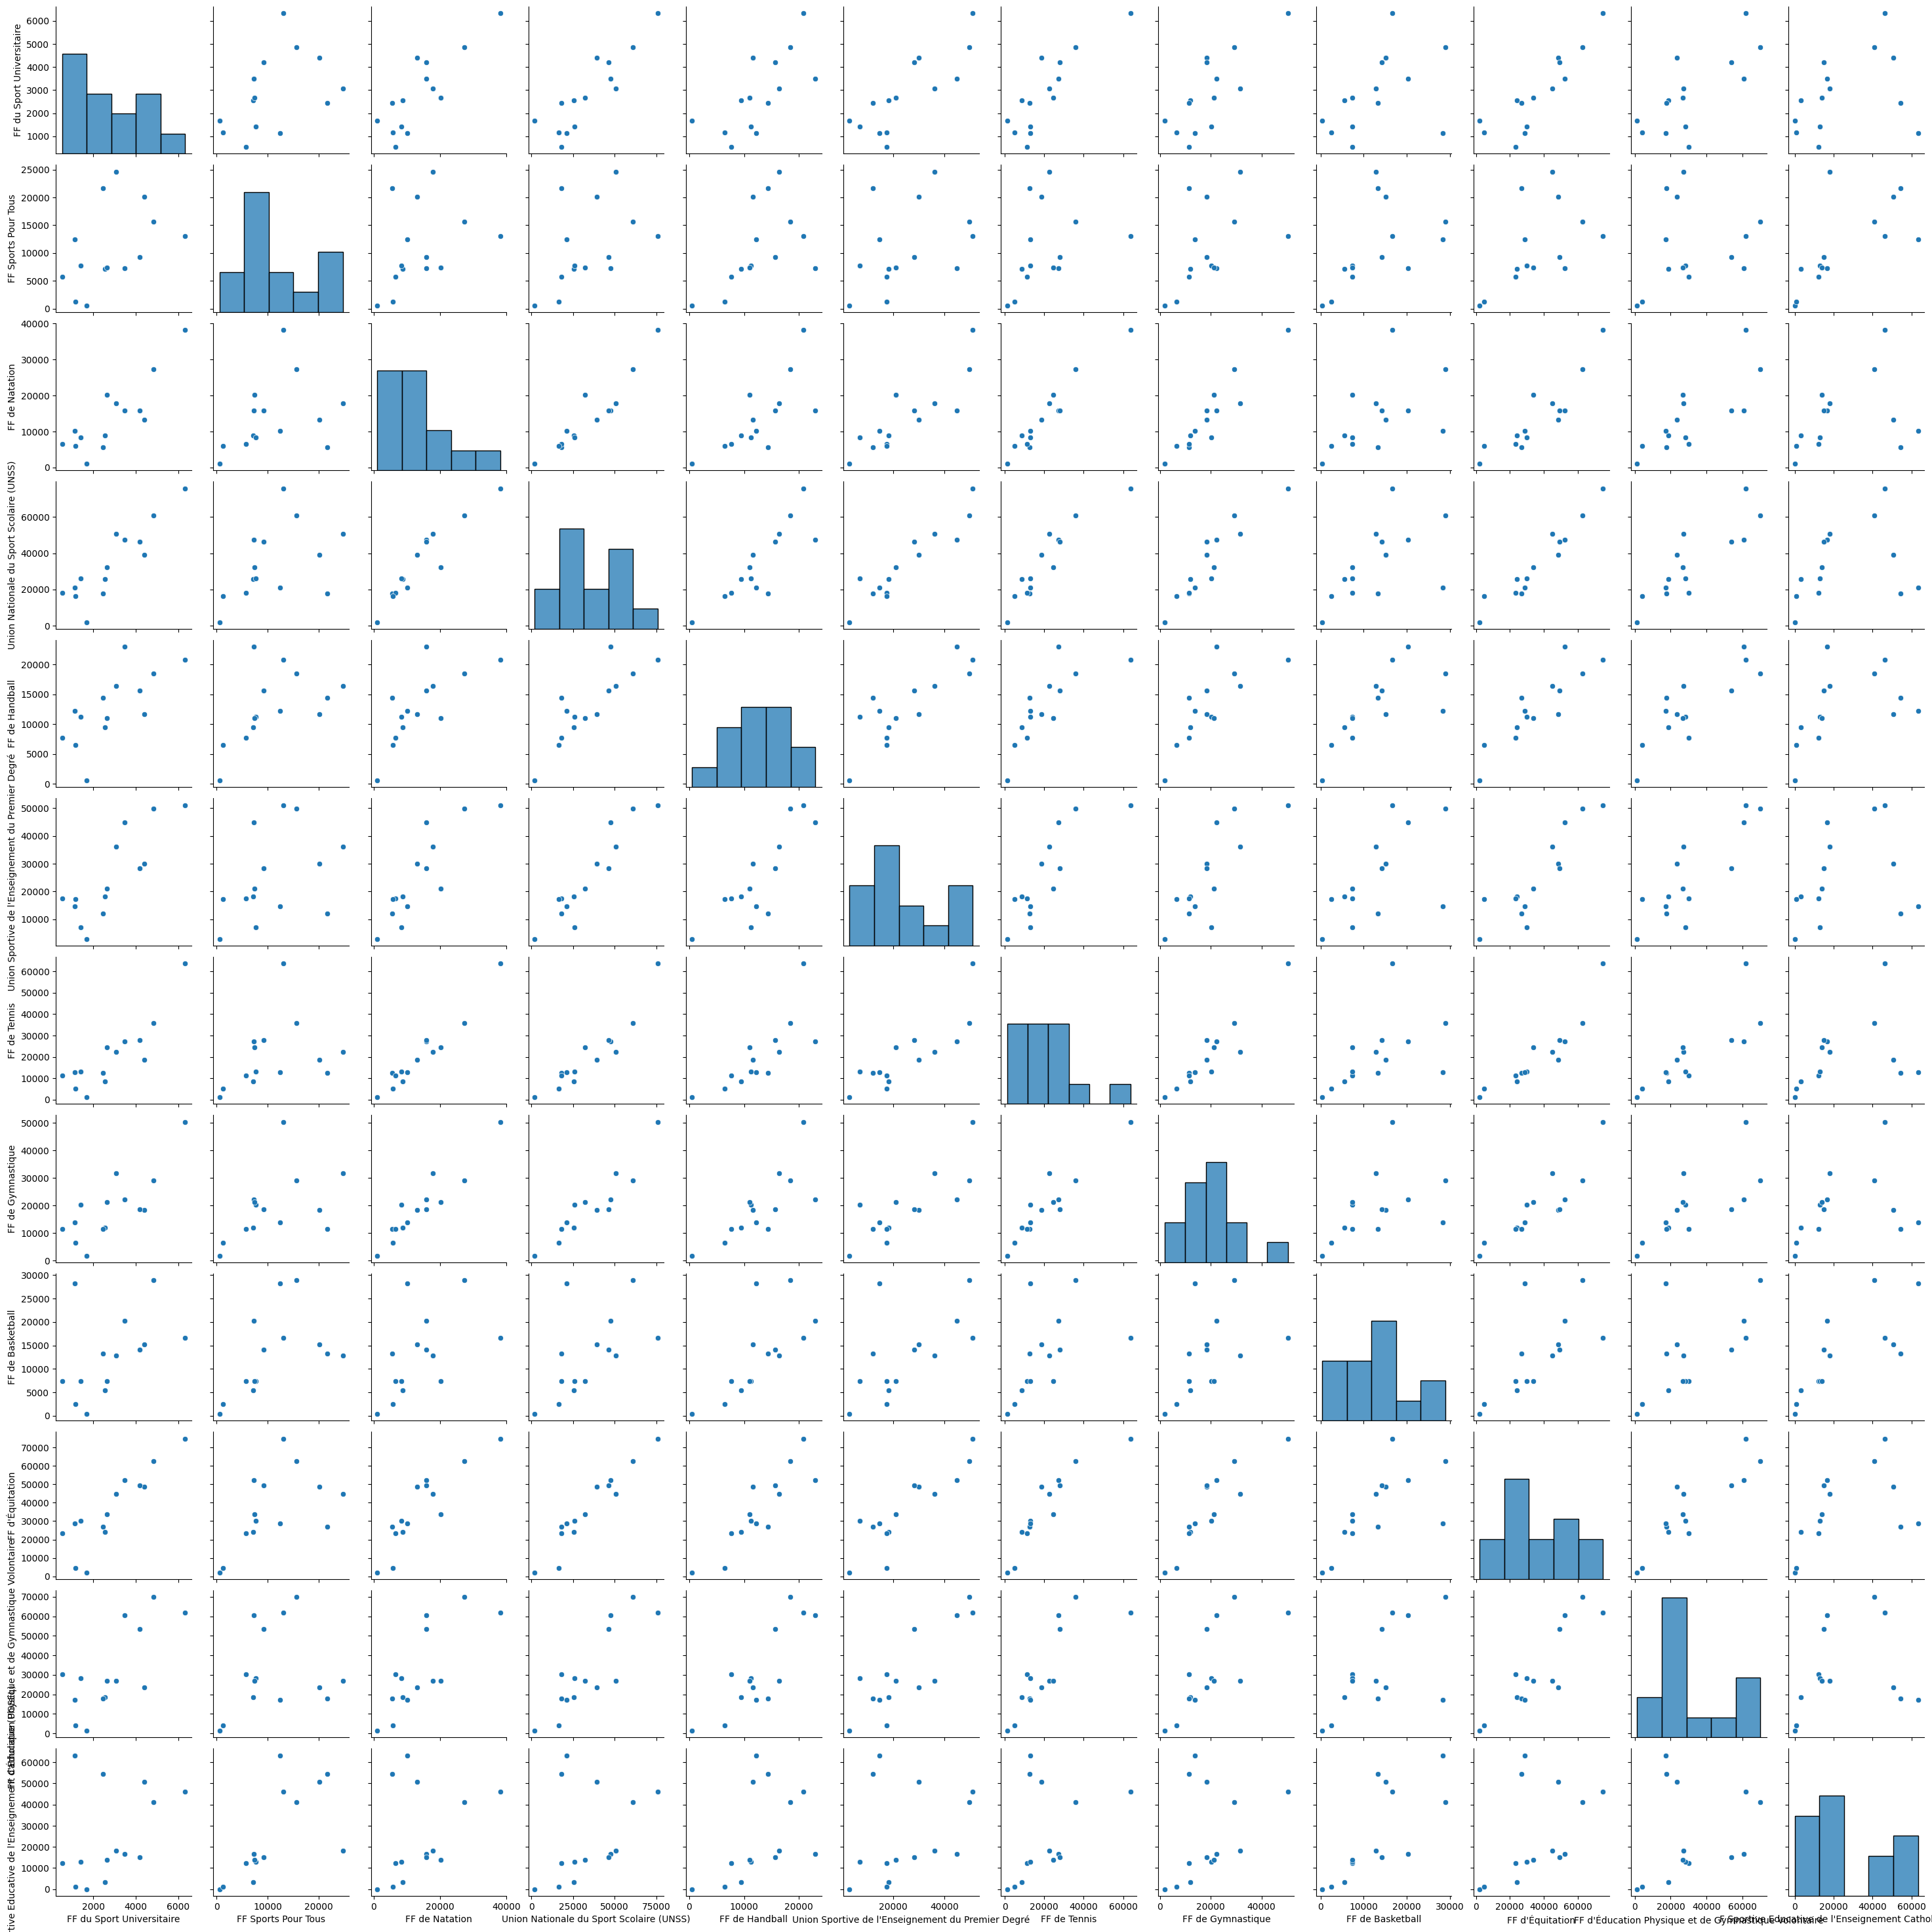

In [36]:
#graphique bivaré
sns.pairplot(base_classification_femme)

In [38]:
corelation_spearman= base_classification_femme.corr(method='spearman')
corelation_spearman

,FF du Sport Universitaire,FF Sports Pour Tous,FF de Natation,Union Nationale du Sport Scolaire (UNSS),FF de Handball,Union Sportive de l'Enseignement du Premier Degré,FF de Tennis,FF de Gymnastique,FF de Basketball,FF d'Équitation,FF d'Éducation Physique et de Gymnastique Volontaire,F Sportive Educative de l'Enseignement Catholique (UGSEL)
FF du Sport Universitaire,1.000000,0.516484,0.762637,0.837363,0.701099,0.828571,0.802198,0.723077,0.503297,0.859341,0.613187,0.389011
FF Sports Pour Tous,0.516484,1.000000,0.468132,0.564835,0.674725,0.419780,0.551648,0.582418,0.621978,0.595604,0.296703,0.850549
FF de Natation,0.762637,0.468132,1.000000,0.934066,0.723077,0.885714,0.907692,0.920879,0.595604,0.885714,0.731868,0.424176
Union Nationale du Sport Scolaire (UNSS),0.837363,0.564835,0.934066,1.000000,0.832967,0.903297,0.929670,0.951648,0.648352,0.951648,0.832967,0.446154
FF de Handball,0.701099,0.674725,0.723077,0.832967,1.000000,0.736264,0.850549,0.819780,0.832967,0.890110,0.709890,0.696703
Union Sportive de l'Enseignement du Premier Degré,0.828571,0.419780,0.885714,0.903297,0.736264,1.000000,0.815385,0.789011,0.600000,0.850549,0.753846,0.367033
FF de Tennis,0.802198,0.551648,0.907692,0.929670,0.850549,0.815385,1.000000,0.903297,0.714286,0.973626,0.841758,0.525275
FF de Gymnastique,0.723077,0.582418,0.920879,0.951648,0.819780,0.789011,0.903297,1.000000,0.582418,0.898901,0.762637,0.459341
FF de Basketball,0.503297,0.621978,0.595604,0.648352,0.832967,0.600000,0.714286,0.582418,1.000000,0.767033,0.591209,0.828571
FF d'Équitation,0.859341,0.595604,0.885714,0.951648,0.890110,0.850549,0.973626,0.898901,0.767033,1.000000,0.815385,0.578022
